# Проверка гипотез по увеличению выручки в интернет-магазине —оценить результаты A/B теста

# Цели проекта: 

- Приоритизировать 9 гипотез по увеличению выручки интернет-магазина, подготовленных отделом маркетинга
- Запустить A/B тест, проанализировать результаты и подготовить выводы

# Описание проекта

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

# Описание данных

**Данные для первой части**

**Файл /datasets/hypothesis.csv.**

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

**Файл /datasets/orders.csv.**

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv.**

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## 1 Откроем файлы с данными, изучим общую информацию и подготовим к анализу

### 1.1 Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафреймы и сохраним в переменные

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt # импортируем необходимые библиотеки 

In [71]:
hypothesis = pd.read_csv('/Users/ilyasidorov/Downloads/hypothesis.csv') 
orders = pd.read_csv('/Users/ilyasidorov/Downloads/orders.csv')
visitors = pd.read_csv ('/Users/ilyasidorov/Downloads/visitors.csv') # Считаем данные и сохраним в переменные

### 1.2 Изучим общую информацию о данных

In [72]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [73]:
hypothesis.info() # Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [74]:
orders.head() # Посмотрим на таблицу orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [75]:
orders.info() # Общая информация о датафрейме 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [76]:
visitors.head() # Посмотрим на таблицу visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [77]:
visitors.info() # Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [78]:
orders.isna().sum() # Количество пропущенных значений в столбцах

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [79]:
visitors.isna().sum() # Количество пропущенных значений в столбцах

date        0
group       0
visitors    0
dtype: int64

In [80]:
orders.duplicated().sum() # Наличие дубликатов

0

In [81]:
visitors.duplicated().sum() # Наличие дубликатов

0

**Вывод:**

В целом данные впорядке. Дубликатов и пропущенных значений нет. 

Необходимо изменить тип данных в столбцах с датами.

### 1.3 Предобработка данных

In [82]:
orders ['date'] = pd.to_datetime (orders['date'])
visitors ['date'] = pd.to_datetime (visitors['date']) # Заменяем тип данных в столбцах с датами

**Вывод:** 

Данные готовы к анализу 

## 2 Часть 1. Приоритизация гипотез

### 2.1 Приоритезация гипотез методом ICE

In [83]:
hypothesis ['ICE'] = hypothesis ['Impact'] * hypothesis ['Confidence'] / hypothesis ['Efforts']

In [84]:
hypothesis.sort_values (by = 'ICE', ascending = False)
pd.set_option('display.max_colwidth', 0) 
hypothesis # Отсортируем по столбцу 'ICE' и выведем на экран

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


**Вывод:**

В тройке лидеров гипотезы под № 8, 0, 7.

### 2.2 Приоритезация гипотез методом RICE

In [85]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [86]:
hypothesis.sort_values(by = 'RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Вывод:**

Дополнительный параметр охвата (Reach), который я применил в методе RICE изменил приоритетность гипотез.

### Вывод по приоритезации гипотез

Применив 2 разных способа приоритизации гипотез, я получил разные результаты. 

- В случае приоритезации гипотез методом ICE в тройке лидеров были гипотезы под № 8, 0, 7.

- Метод RICE выделил наиболее приоритетные гипотезы под № 7, 2, 0. 

В расчете методом ICE я не учитывал количество пользователей, которых затронут изменения. Поэтому мы получили разные результаты.

## 3 Часть 2. Анализ A/B-теста

### 3.1 График кумулятивной выручки по группам

In [87]:
datesGroups = orders[['date', 'group']].drop_duplicates() # Уникальные значения без дубликатов

In [88]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group']) # Кумулятивные показатели из таблицы orders

In [89]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group']) # Кумулятивные показатели из таблицы visitors

In [90]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Объединим в одну таблицу

In [91]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] # Названия столбцов

In [92]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


**Строим график кумулятивной выручки по группам**

In [93]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']] # Группа A

In [94]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']] # Группа B

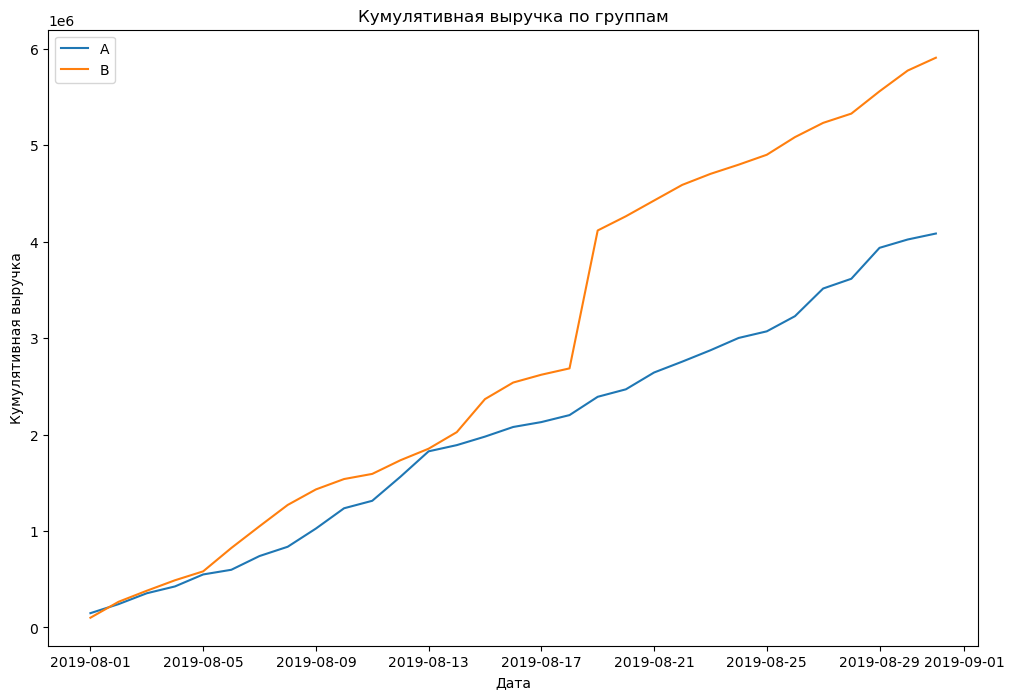

In [95]:
plt.figure(figsize= (12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A') # График выручки группа А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B') # График выручки группа В
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по группам')
plt.legend()

**Вывод:** 

Кумулятивная выручка группы A меньше, чем у группы B. В середине августа наблюдается резкий скачек выручки у группы B. Возможно, что такие резкие скачки обусловлены дорогими покупками пользователей.

### 3.2 График кумулятивного среднего чека по группам

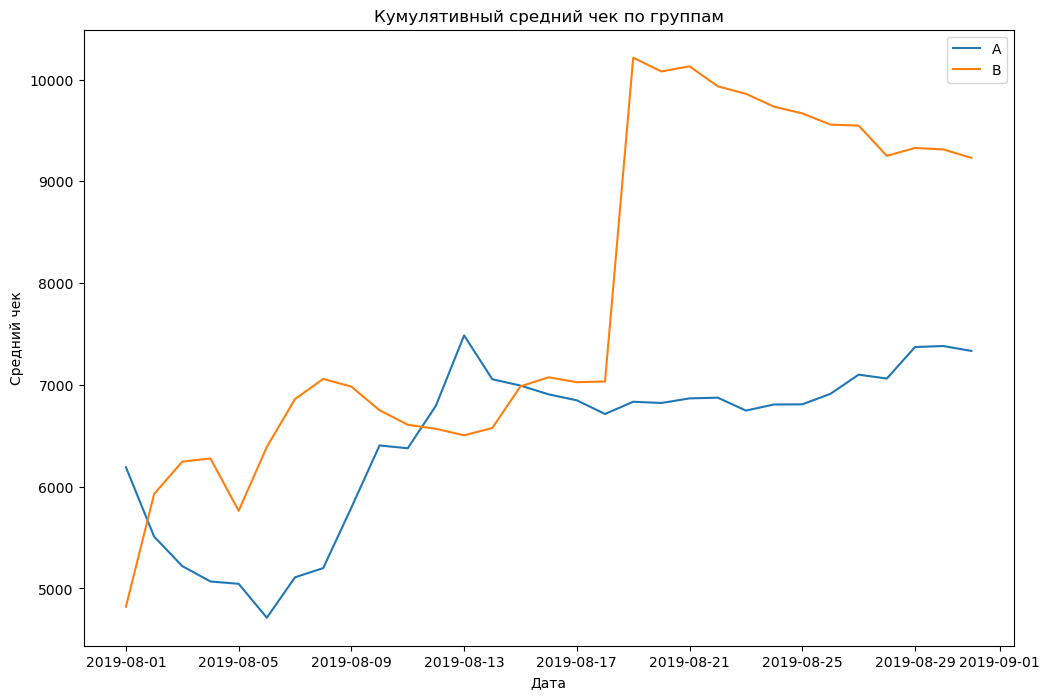

In [96]:
plt.figure(figsize= (12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек по группам')
plt.legend() 

**Вывод:**

Средний чек у группы B за месяц практически всегда был выше, чем у группы A. Как и в прошлом графике у группы B наблюдается резкий скачек в середине августа. Возможно, что такие резкие скачки обусловлены дорогими покупками пользователей. 

### 3.3 График относительного изменения кумулятивного среднего чека группы B к группе A

In [97]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

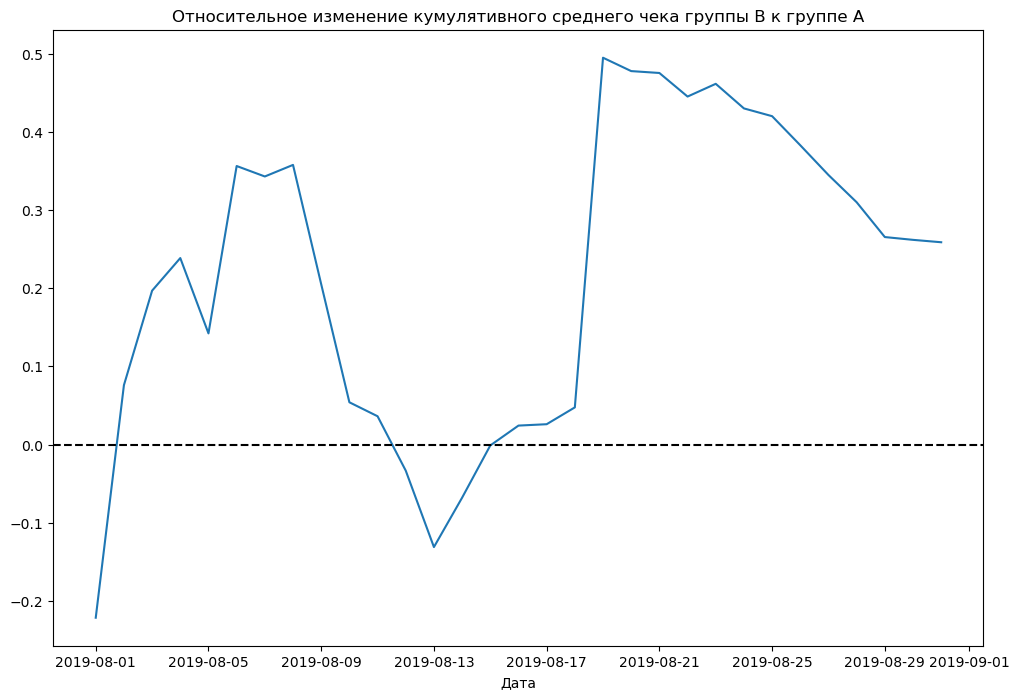

In [98]:
plt.figure(figsize= (12,8))

plt.plot(mergedCumulativeRevenue['date'], 
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')

**Вывод:**

На графике наблюдаются значительные и резкие колебания в несколько дат. В данных есть выбросы.

### 3.4 График кумулятивного среднего количества заказов на посетителя по группам

In [99]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] 

In [100]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

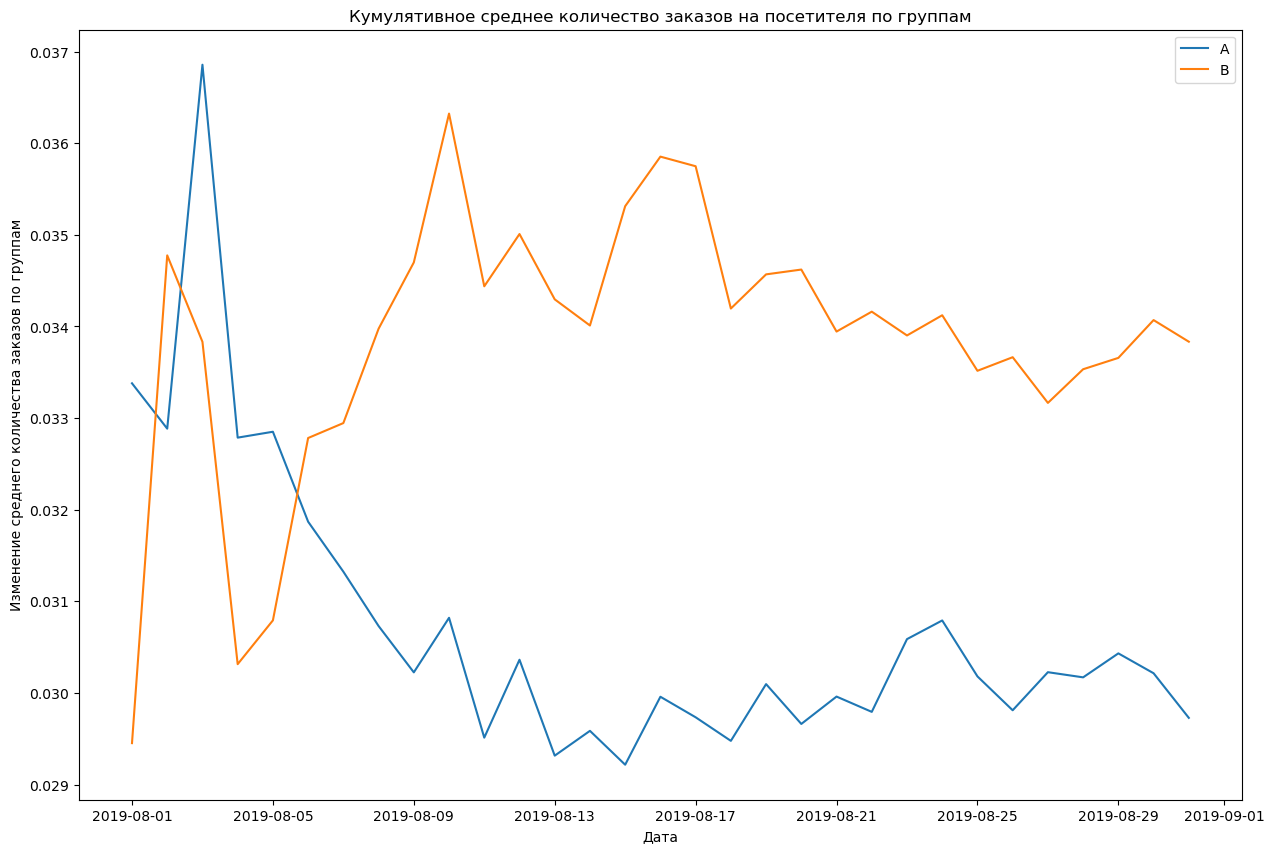

In [101]:
plt.figure(figsize= (15,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего количества заказов по группам')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.legend()

**Вывод:**

По графику видим, что среднее количество заказов у группы A в начале месяца была значительно больше, чем у группы B. Достигнув пика среднее количество заказов группы A начала стремительно падать и до конца месяца показатель оставался на минимальном уровне. У группы B наблюдается скачки, но в целом среднее количество заказов значительно выше, чем у группы A.

### 3.5 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [102]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

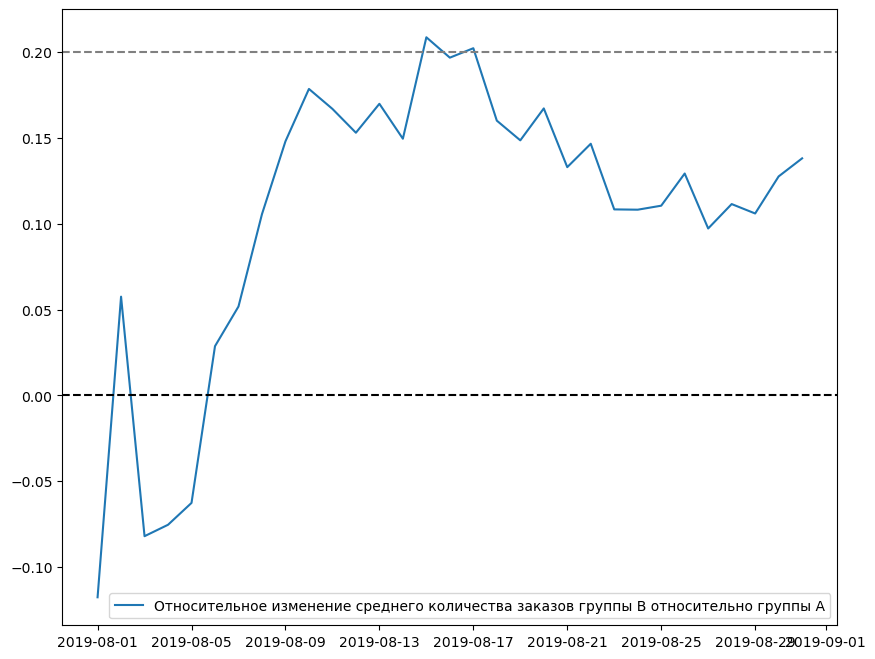

In [103]:
plt.figure(figsize= (10,8))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
        mergedCumulativeConversions['conversionA']-1, 
        label= "Относительное изменение среднего количества заказов группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

**Вывод:**

С первой недели группа B лидирует по среднему количеству заказов. В середине месяца среднее количество заказов группы B достигает пиковых значений. К концу месяца видим незначительный спад. Относительный прирост по количеству заказов группы B относительно группы A примерно 15%.

### 3.6 Точечный график количества заказов по пользователям

In [104]:
ordersByUsers = (
    orders.groupby('visitorId', as_index = False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values (by = 'orders', ascending = False)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


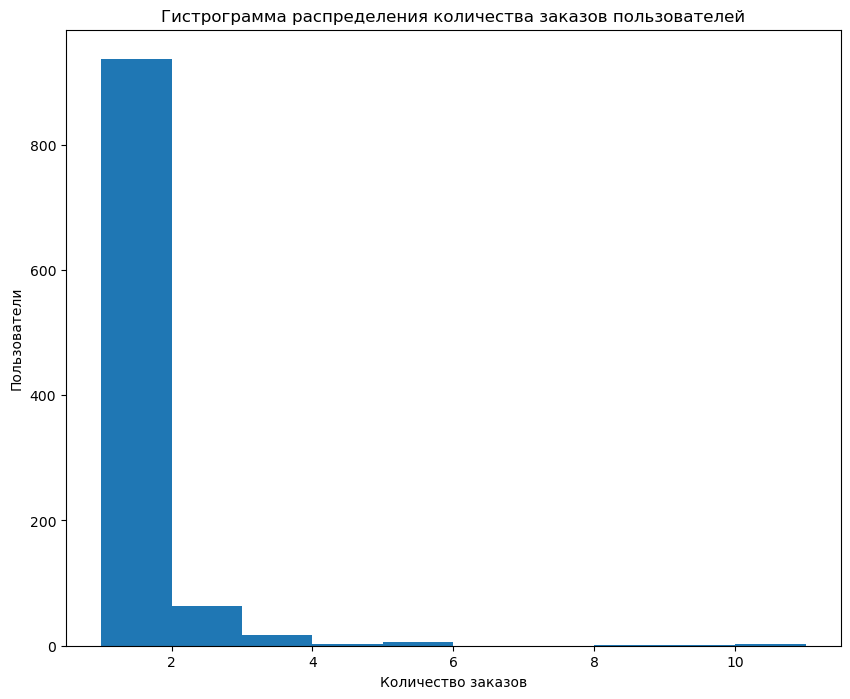

In [105]:
plt.figure(figsize= (10,8))
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов пользователей')
plt.ylabel('Пользователи')
plt.xlabel('Количество заказов')
plt.show()

In [106]:
x_values = pd.Series(range(0, len(ordersByUsers)))

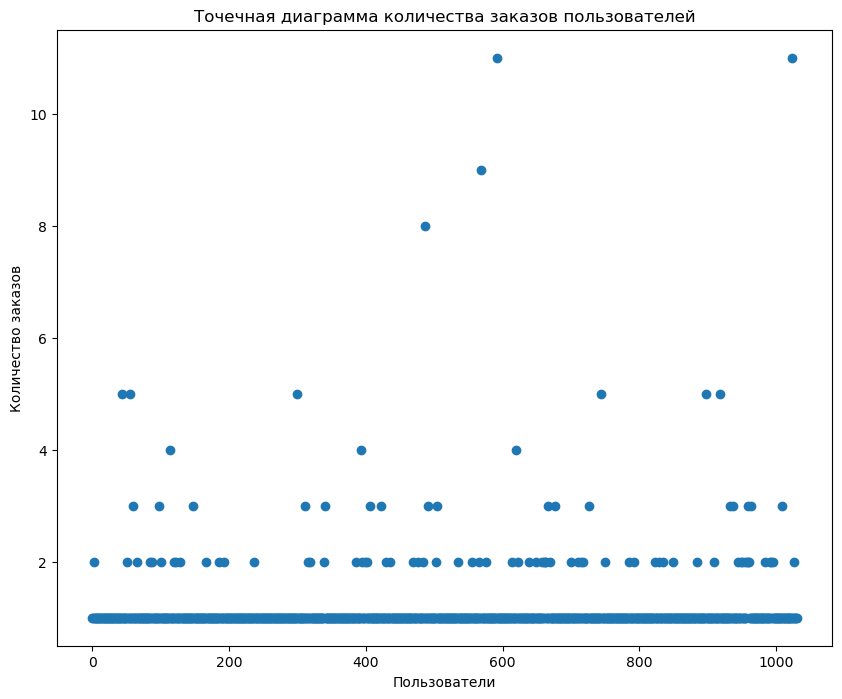

In [107]:
plt.figure(figsize= (10,8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма количества заказов пользователей')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

**Вывод:**

По графикам видим, что большая часть пользователей совершило всего 1 заказ. Пользователей, которые совершили 2 заказа и более совсем мало.

### 3.7 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных заказов

In [108]:
percentile = np.percentile(ordersByUsers ['orders'], [95, 99])
percentile

array([2., 4.])

**Вывод:**

Не более 5% пользователей совершали больше двух заказов. Установим по ней границу аномальных заказов.

Не более 1% пользователей, которые совершили более четырех заказов. 

### 3.8 Точечный график стоимостей заказов

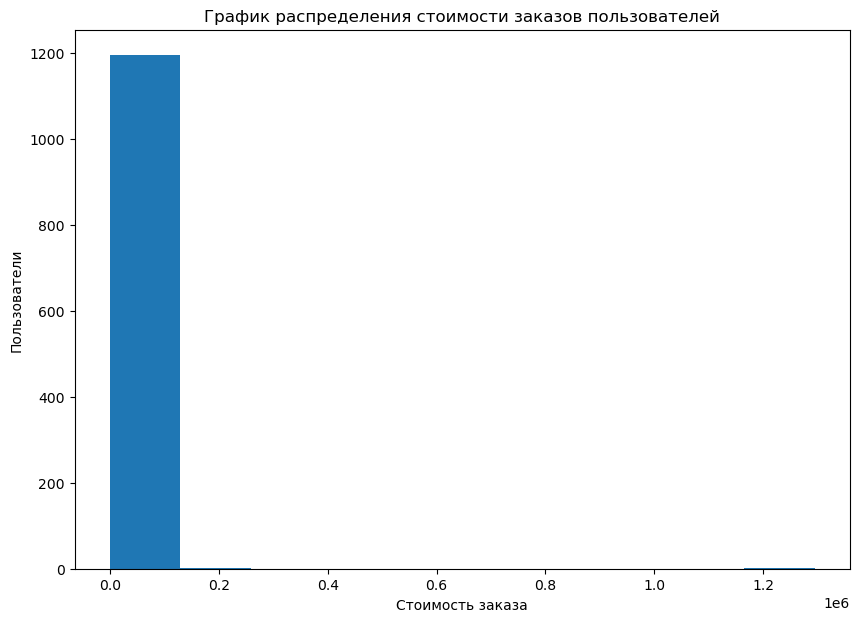

In [109]:
plt.figure(figsize= (10,7))
plt.hist(orders ['revenue'])
plt.title('График распределения стоимости заказов пользователей')
plt.ylabel('Пользователи')
plt.xlabel('Стоимость заказа')
plt.show()

In [110]:
x_values = pd.Series(range(0, len(orders['revenue'])))

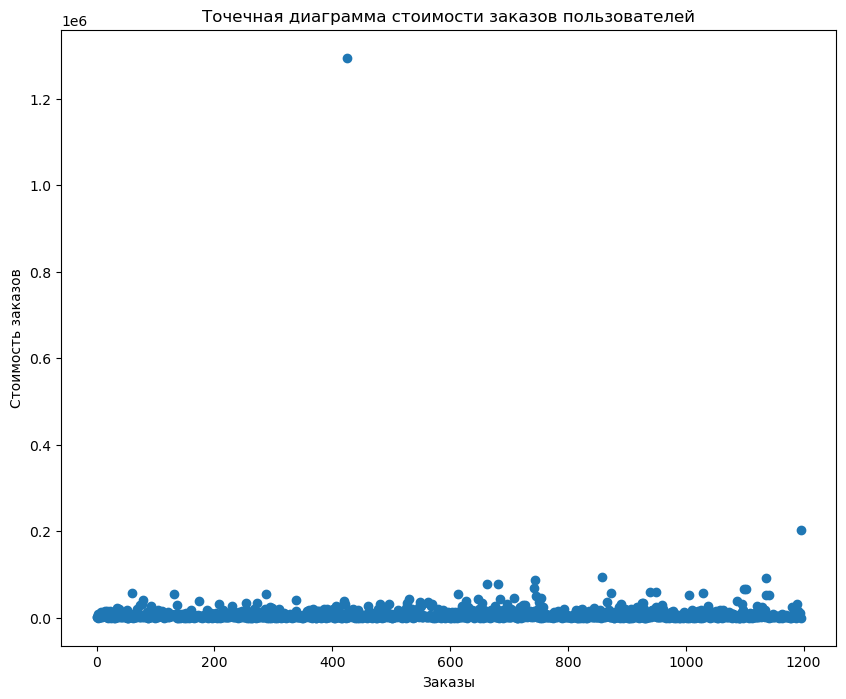

In [111]:
plt.figure(figsize= (10,8))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости заказов пользователей')
plt.ylabel('Стоимость заказов')
plt.xlabel('Заказы')
plt.show()

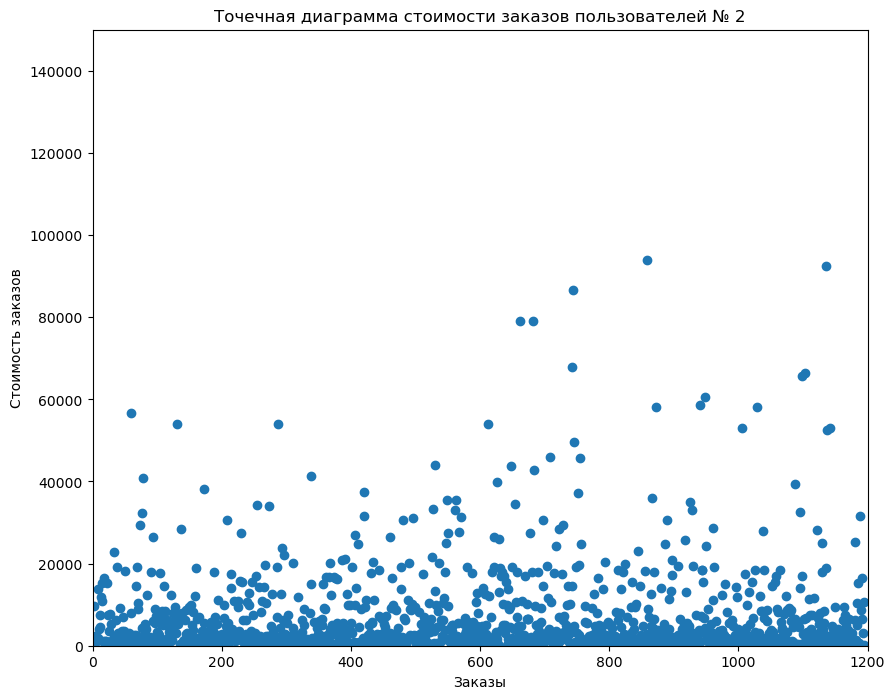

In [112]:
plt.figure(figsize= (10,8))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости заказов пользователей № 2')
plt.ylabel('Стоимость заказов')
plt.xlabel('Заказы')
plt.xlim(0, 1200)
plt.ylim (0, 150000)
plt.show()

**Вывод:**

По графикам видим, что у большинства пользователей стоимость заказов не привышает 100 тысяч. На точечной диаграмме видны заказы с аномально высоким чеком на 1,4 млн и 200 тысяч. Чтобы определить границу аномальных заказов рассчитаем процентили.

### 3.9 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [113]:
percentile_2 = np.percentile(orders['revenue'], [95, 99])
percentile_2

array([28000. , 58233.2])

**Вывод:**

- 95% заказов не превышает 28 тысяч. 

- 99% заказов не превышает 58 233. Установим по ней границу аномальных заказов.

### 3.10 Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Создадим несколько таблиц и объединим их в одну переменную. 

In [114]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),axis=1,)

visitorsACummulative.columns = ['date', 'visitors_cummulative_a']

In [115]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),axis=1,)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [116]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),axis=1,).sort_values(by=['date'])

ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

In [117]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),axis=1,).sort_values(by=['date'])

ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [118]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

ordersByUsersA.columns = ['visitorId', 'orders']

In [119]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [120]:
sampleA = pd.concat([ordersByUsersA['orders'],
                      pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - 
                      len(ordersByUsersA['orders'])), 
                      name='orders')],axis=0)

In [121]:
sampleB = pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - 
                      len(ordersByUsersB['orders'])), 
                      name='orders')],axis=0)

**Гипотезы:**

- H0 - различий в среднем количестве заказов между группами A и B нет
- H1 - различия в среднем количестве заказов между группами A и B есть 

In [122]:
alpha = 0.05

In [123]:
p_value = round(stats.mannwhitneyu(sampleA, sampleB)[1], 4)
display ('P-value: {}'.format (p_value))

'P-value: 0.0168'

In [124]:
i = round(sampleB.mean() / sampleA.mean() - 1, 3)
display ('Относительный прирост в среднем количестве заказов группы B к группе A: {}'.format (i))

'Относительный прирост в среднем количестве заказов группы B к группе A: 0.138'

**Вывод:**

Применен метод Манна-Уитни для проверки гипотез. 

P-value меньше 0.05. Есть различия в среднем количестве заказов между группами. 

Относительный прирост в среднем количестве заказов группы B к группе A - 13,8%

### 3.11 Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Гипотезы:**

- H0 - различий в среднем чеке в между группами A и B нет
- H1 - различия в среднем чеке между группами A и B есть 

In [125]:
alpha = 0.05

In [126]:
p_value_2 = round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1], 4)
display ('P-value: {}'.format (p_value_2))

'P-value: 0.7293'

In [127]:
i_2 = round(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean() - 1, 3)
display ('Разница в среднем чеке между группами B и А: {}'.format (i_2))

'Разница в среднем чеке между группами B и А: 0.259'

**Вывод:**

P-value больше 0.05. Нет различий в среднем чеке между группами A и B.

Есть существенная разница в средних чеках - 25,9%.

### 3.12 Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Аномальные пользователи:**

- Пользователи, которые совершили более 2х заказов
- Пользователи, которые совершили заказ дороже 53 тысяч

Сделаем срез и объединим их в таблицу abnormalUsers

In [128]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
) # Cрез по заказам

usersWithExpensiveOrders = orders[orders['revenue'] > 53000]['visitorId'] # Срез по стоимости

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
) 

abnormalUsers.head(15)
abnormalUsers.shape[0]

34

Выявлено 34 аномальных пользователей

In [130]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
        index=np.arange(
            visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
        ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,)

**Гипотезы:**

- H0 - различий в среднем количестве заказов между группами A и B по 'очищенным' данным нет
- H1 - различия в среднем количестве заказов между группами A и B по 'очищенным' данным есть 

In [131]:
alpha = 0.05

In [132]:
p_value_3 = round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], 4)
display ('P-value: {}'.format (p_value_3))

'P-value: 0.0091'

In [133]:
i_3 = round(sampleBFiltered.mean()/sampleAFiltered.mean()-1, 3)
display ('Относительный прирост в среднем количестве заказов группы B к группе A по "очищенным" данным: {}'
         .format (i_3))

'Относительный прирост в среднем количестве заказов группы B к группе A по "очищенным" данным: 0.177'

**Вывод:**

P-value меньше 0.05. Есть различия в среднем количестве заказов между группами после очистки.

Относительный прирост в среднем количестве заказов группы B к группе A после очистки данных - 17,7%.

### 3.13 Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Гипотезы:**

- H0 - различий в среднем чеке в между группами A и B по 'очищенным' данным нет
- H1 - различия в среднем чеке между группами A и B по 'очищенным' данным есть 

In [134]:
alpha = 0.05

In [135]:
p_value_4 = round(stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1], 3)
display ('P-value: {}'.format (p_value_4))

'P-value: 0.849'

In [136]:
i_4 = round(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1 ,3)
display ('Разница в среднем чеке между группами B и А по "очищенным" данным: {}'.format (i_4))

'Разница в среднем чеке между группами B и А по "очищенным" данным: -0.003'

**Вывод:**

P-value больше 0.05. После отчистки данных от аномальных пользователей различий в среднем чеке между группами A и B также нет.

Разница в средних чеках после отчистки данных минимальная. Скорее всего, на результат повлияло исключение аномально больших заказов на сумму 1,4 млн и 200 тысяч.

## Решение по результатам теста

**Варианты решений:**

- Остановить тест, зафиксировать победу одной из групп
- Остановить тест, зафиксировать отсутствие различий между группами
- Продолжить тест

При анализе A/B теста было выявлено, что до и после удаления аномальных пользователей есть существенные различия в среднем количестве заказов у групп A и B. 

- Относительный прирост в среднем количестве заказов у группы B к группе A до удаления аномальных пользователей состовлял 13,8%.
- Относительный прирост в среднем количестве заказов у группы B к группе A после удаления аномальных пользователей состовлял 17,7%.

Различия в средних чеках между группами A и B отсутсвовали до и после удаления аномальных пользователей. Средний чек до удаления аномальных пользователей у группы B был больше на 25,9%, чем у группы A. Это связано с аномально большими заказами в группе B (на 1,4 млн и 200 тысяч). После удаления аномальных заказов средний чек в группах сравнялся.

**Решение:**

Остановить тест, зафиксировать победу группы B.